In [1]:
import pandas
import numpy as np

In [2]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import seaborn as sns

In [3]:
df=pandas.read_csv("data.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB
None


In [7]:
print(df.groupby('target').size())

target
0    138
1    165
dtype: int64


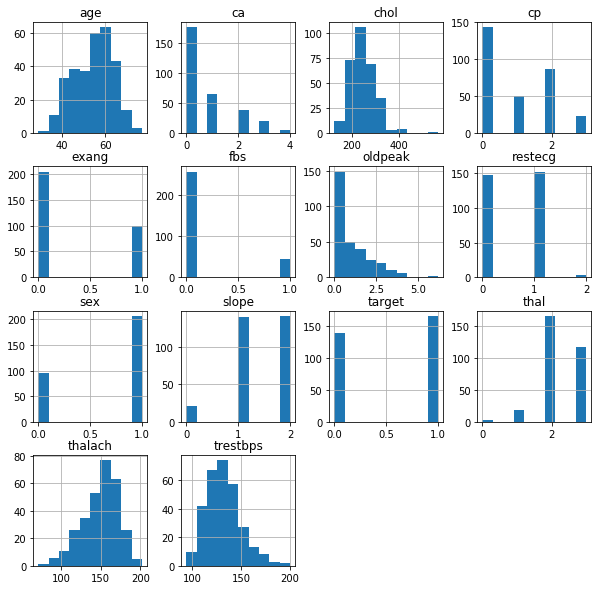

In [8]:
df.hist(figsize=(10,10))
plt.savefig('histogram.png')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


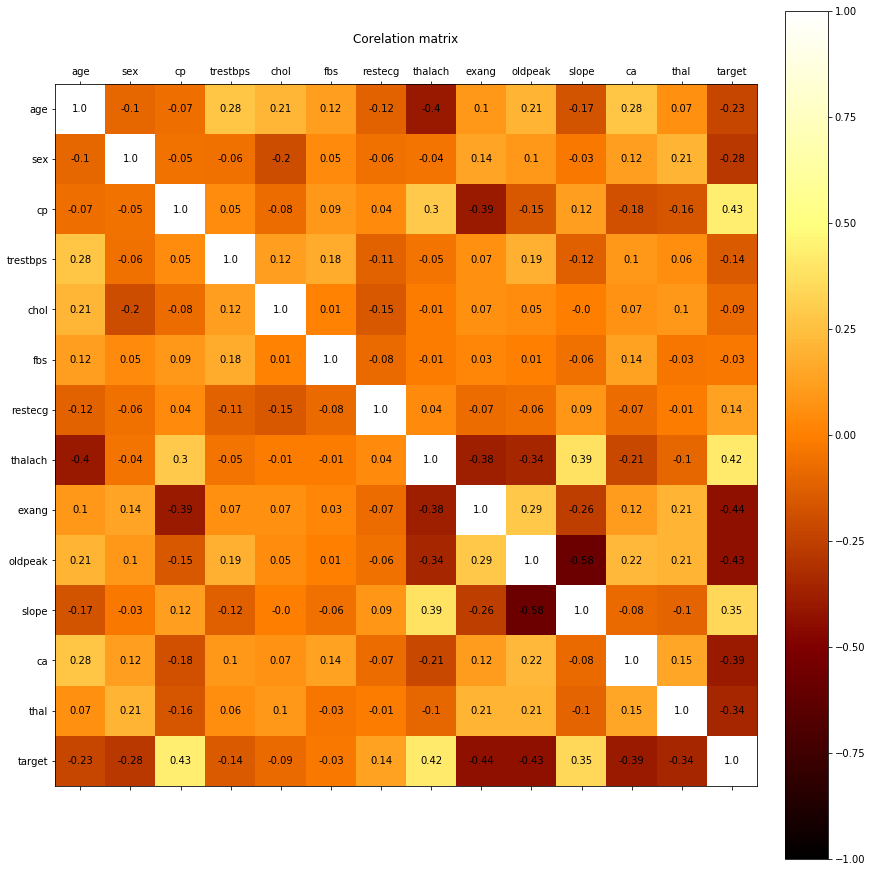

In [9]:
names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
correlations = df.corr()
fig, ax = plt.subplots(1,1, figsize = (12,12),constrained_layout=True)
cax = ax.matshow(correlations, vmin=-1, vmax=1,cmap = 'afmhot')
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
for i in range(len(names)):
    for j in range(len(names)):
        text = ax.text(j, i, df.corr().as_matrix(columns= None)[i, j].round(decimals =2),
                       ha="center", va="center", color="black")
plt.title("Corelation matrix")
plt.savefig("Corelation matrix.png")
plt.show()

In [10]:
male_count = df.sex.value_counts().tolist()[0]
female_count = df.sex.value_counts().tolist()[1]
print('Male :',male_count)
print('Female :',female_count)

Male : 207
Female : 96


In [11]:
def check(x):
    if x==1:
        return 'Male'
    else:
        return 'Female'

In [12]:
df['Gender'] = df['sex'].apply(check)

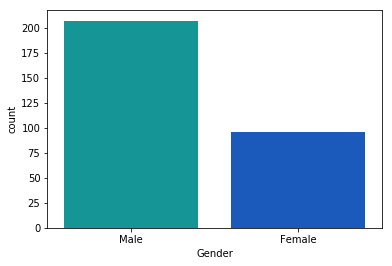

In [13]:
sns.countplot(df['Gender'], palette = ("winter_r"))
plt.savefig('Gender ratio.png')
plt.show()

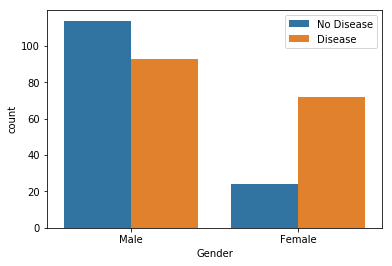

In [14]:
sns.countplot(df['Gender'], hue=df['target'])
plt.legend(["No Disease", "Disease"])
plt.savefig('disease stats.png')
plt.show()

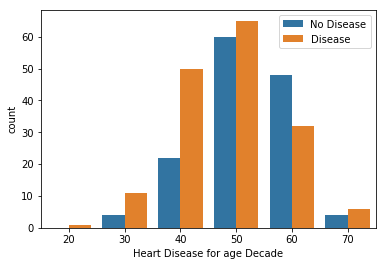

In [15]:
df['age_dec'] = df.age.map(lambda age: 10 * (age // 10))
sns.countplot(x="age_dec",hue = "target", data=df)
plt.legend(["No Disease", "Disease"])
plt.xlabel("Heart Disease for age Decade")
plt.savefig('Age per decade.png')
plt.show()

In [16]:
labels_F = ['FemaleWithNoDisease', 'FemaleWithDisease',]
sizes_F = [len(df[df.sex == 0])-len(df[(df.sex == 0) & (df.target == 1)]),len(df[(df.sex == 0) & (df.target == 1)])]

labels_M = ['MaleWithNoDisease', 'MaleWithDisease',]
sizes_M = [len(df[df.sex == 1])-len(df[(df.sex == 1) & (df.target == 1)]),len(df[(df.sex == 1) & (df.target == 1)])]

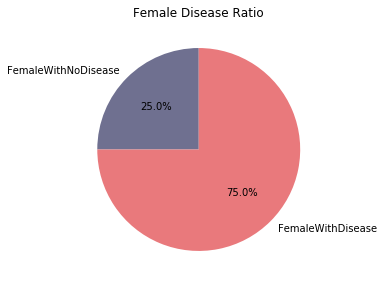

In [17]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(121)
ax1.pie(sizes_F, colors = ['#6F7090','#E9797C'], labels=labels_F, autopct='%1.1f%%', startangle=90)
plt.title('Female Disease Ratio')
plt.savefig('Female Disease Ratio.png')
plt.show()

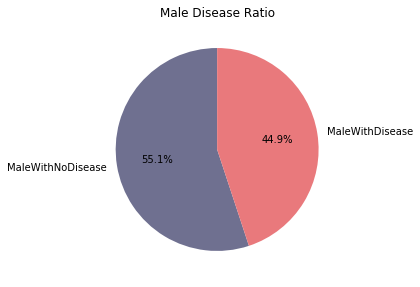

In [18]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(121)
ax1.pie(sizes_M, colors = ['#6F7090','#E9797C'], labels=labels_M, autopct='%1.1f%%', startangle=90)
plt.title('Male Disease Ratio')
plt.savefig('Male Disease Ratio.png')
plt.show()

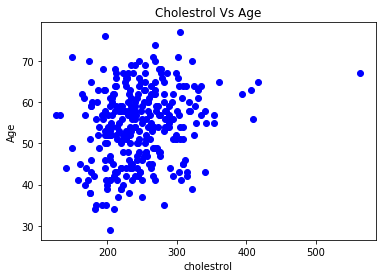

In [19]:
plt.scatter(x = 'chol', y = 'age', color = 'blue', data = df) 
plt.xlabel('cholestrol')                   
plt.ylabel('Age')     
plt.title('Cholestrol Vs Age') 
plt.savefig('Cholestrol Vs Age.png')
plt.show()

In [20]:
array = df.values
X = array[:,0:14]
Y = array[:,14]
validation_size = 0.3
seed = 7
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [21]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('K Neighbors Classifier', KNeighborsClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Gaussian Naive Bayes', GaussianNB()))
models.append(('Support Vector Machine', SVC(gamma='auto')))
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f" % (name, cv_results.mean()*100)
	print(msg,"%")

Logistic Regression: 100.000000 %
Linear Discriminant Analysis: 71.277056 %
K Neighbors Classifier: 59.480519 %
Decision Tree Classifier: 100.000000 %
Gaussian Naive Bayes: 100.000000 %
Support Vector Machine: 65.649351 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anacond